### Importing modules 

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from torch import optim
from ignite.metrics import *
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator

### Downloading dataset

In [2]:
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))                       

### Load data to dataloader

In [3]:
trainset = DataLoader(batch_size=10, dataset=train, shuffle=True)
testset = DataLoader(batch_size=10, dataset=test, shuffle=True)

### Show example of image

Label = 9


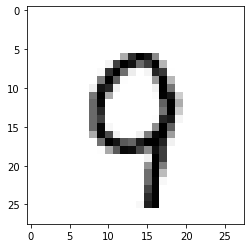

In [4]:
dataiter = iter(trainset)
images, labels = dataiter.next()
plt.imshow(images[0].view(28, 28), cmap='gray_r')
print('Label =', int(labels[0]))

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(28*28, 68)
        self.hidden_layer = nn.Linear(68, 25)
        self.output_layer = nn.Linear(25, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        x = F.log_softmax(self.output_layer(x), dim=1)
        return x

In [6]:
epochs = 10
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

In [7]:
trainer = create_supervised_trainer(model, optimizer, criterion)
evaluator = create_supervised_evaluator(model,
                                        metrics={
                                            'accuracy': Accuracy(),
                                            'nll': Loss(criterion)
                                            })

In [8]:
@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(trainer):
    print("Epoch[{}] Loss: {:.2f}".format(trainer.state.epoch, trainer.state.output))

@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    evaluator.run(trainset)
    metrics = evaluator.state.metrics
    print("Training Results - Epoch: {}  Avg accuracy: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics['accuracy'], metrics['nll']))

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    evaluator.run(testset)
    metrics = evaluator.state.metrics
    print("Validation Results - Epoch: {}  Avg accuracy: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics['accuracy'], metrics['nll']))
    
trainer.run(trainset, max_epochs=10)

Epoch[1] Loss: 2.34
Epoch[1] Loss: 2.33
Epoch[1] Loss: 2.27
Epoch[1] Loss: 2.37
Epoch[1] Loss: 2.30
Epoch[1] Loss: 2.30
Epoch[1] Loss: 2.28
Epoch[1] Loss: 2.32
Epoch[1] Loss: 2.31
Epoch[1] Loss: 2.32
Epoch[1] Loss: 2.35
Epoch[1] Loss: 2.33
Epoch[1] Loss: 2.29
Epoch[1] Loss: 2.27
Epoch[1] Loss: 2.29
Epoch[1] Loss: 2.34
Epoch[1] Loss: 2.30
Epoch[1] Loss: 2.33
Epoch[1] Loss: 2.32
Epoch[1] Loss: 2.28
Epoch[1] Loss: 2.28
Epoch[1] Loss: 2.33
Epoch[1] Loss: 2.26
Epoch[1] Loss: 2.25
Epoch[1] Loss: 2.30
Epoch[1] Loss: 2.29
Epoch[1] Loss: 2.24
Epoch[1] Loss: 2.27
Epoch[1] Loss: 2.38
Epoch[1] Loss: 2.32
Epoch[1] Loss: 2.24
Epoch[1] Loss: 2.36
Epoch[1] Loss: 2.36
Epoch[1] Loss: 2.27
Epoch[1] Loss: 2.30
Epoch[1] Loss: 2.25
Epoch[1] Loss: 2.31
Epoch[1] Loss: 2.25
Epoch[1] Loss: 2.28
Epoch[1] Loss: 2.26
Epoch[1] Loss: 2.29
Epoch[1] Loss: 2.28
Epoch[1] Loss: 2.33
Epoch[1] Loss: 2.24
Epoch[1] Loss: 2.29
Epoch[1] Loss: 2.30
Epoch[1] Loss: 2.28
Epoch[1] Loss: 2.25
Epoch[1] Loss: 2.22
Epoch[1] Loss: 2.25


Epoch[1] Loss: 1.03
Epoch[1] Loss: 0.78
Epoch[1] Loss: 1.22
Epoch[1] Loss: 0.80
Epoch[1] Loss: 0.77
Epoch[1] Loss: 0.85
Epoch[1] Loss: 1.00
Epoch[1] Loss: 1.05
Epoch[1] Loss: 0.89
Epoch[1] Loss: 1.22
Epoch[1] Loss: 1.33
Epoch[1] Loss: 0.64
Epoch[1] Loss: 1.42
Epoch[1] Loss: 1.24
Epoch[1] Loss: 1.27
Epoch[1] Loss: 1.27
Epoch[1] Loss: 1.05
Epoch[1] Loss: 0.92
Epoch[1] Loss: 0.82
Epoch[1] Loss: 0.85
Epoch[1] Loss: 1.21
Epoch[1] Loss: 0.99
Epoch[1] Loss: 0.98
Epoch[1] Loss: 1.17
Epoch[1] Loss: 1.08
Epoch[1] Loss: 1.18
Epoch[1] Loss: 0.70
Epoch[1] Loss: 0.61
Epoch[1] Loss: 0.75
Epoch[1] Loss: 0.83
Epoch[1] Loss: 0.66
Epoch[1] Loss: 0.81
Epoch[1] Loss: 0.88
Epoch[1] Loss: 0.87
Epoch[1] Loss: 0.81
Epoch[1] Loss: 0.83
Epoch[1] Loss: 1.02
Epoch[1] Loss: 1.67
Epoch[1] Loss: 0.92
Epoch[1] Loss: 0.54
Epoch[1] Loss: 0.80
Epoch[1] Loss: 0.71
Epoch[1] Loss: 0.89
Epoch[1] Loss: 0.93
Epoch[1] Loss: 0.75
Epoch[1] Loss: 1.10
Epoch[1] Loss: 1.08
Epoch[1] Loss: 0.81
Epoch[1] Loss: 0.96
Epoch[1] Loss: 0.99


Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.70
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.90
Epoch[1] Loss: 0.74
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.58
Epoch[1] Loss: 0.44
Epoch[1] Loss: 1.32
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.98
Epoch[1] Loss: 0.51
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.39
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.58
Epoch[1] Loss: 0.45
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.57
Epoch[1] Loss: 1.39
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.37
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.39
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.52
Epoch[1] Loss: 1.10
Epoch[1] Loss: 0.22
Epoch[1] Loss: 1.06
Epoch[1] Loss: 0.49
Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.32
Epoch[1] Loss: 0.57
Epoch[1] Loss: 0.97
Epoch[1] Loss: 0.94
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.76
Epoch[1] Loss: 0.51
Epoch[1] Loss: 0.83
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.51
Epoch[1] Loss: 0.65
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.36
Epoch[1] Loss: 1.34


Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.74
Epoch[1] Loss: 0.75
Epoch[1] Loss: 0.36
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.56
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.45
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.58
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.41
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.71
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.69
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.46
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.73
Epoch[1] Loss: 0.30
Epoch[1] Loss: 1.26
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.38
Epoch[1] Loss: 0.42
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.45
Epoch[1] Loss: 0.68
Epoch[1] Loss: 0.95
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.24


Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.78
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.38
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.92
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.26
Epoch[1] Loss: 1.23
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.57
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.41
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.74
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.48
Epoch[1] Loss: 0.79
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.38
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.72
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.57
Epoch[1] Loss: 0.39
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.76
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.61
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.19


Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.52
Epoch[1] Loss: 0.53
Epoch[1] Loss: 0.55
Epoch[1] Loss: 0.58
Epoch[1] Loss: 1.19
Epoch[1] Loss: 0.75
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.79
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.81
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.42
Epoch[1] Loss: 0.66
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.10
Epoch[1] Loss: 1.27
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.42
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.55
Epoch[1] Loss: 0.29
Epoch[1] Loss: 1.79
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.53
Epoch[1] Loss: 0.12


Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.20
Epoch[1] Loss: 0.45
Epoch[1] Loss: 1.10
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.48
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.55
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.52
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.96
Epoch[1] Loss: 0.53
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.56
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.54
Epoch[1] Loss: 0.64
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.56
Epoch[1] Loss: 1.09
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.66
Epoch[1] Loss: 0.83
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.60
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.69
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.48
Epoch[1] Loss: 0.73
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.69
Epoch[1] Loss: 0.23
Epoch[1] Loss: 0.14


Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.33
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.36
Epoch[1] Loss: 0.79
Epoch[1] Loss: 0.74
Epoch[1] Loss: 0.70
Epoch[1] Loss: 0.67
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.23
Epoch[1] Loss: 0.08
Epoch[1] Loss: 1.19
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.42
Epoch[1] Loss: 0.57
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.29


Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.49
Epoch[1] Loss: 0.45
Epoch[1] Loss: 0.39
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.20
Epoch[1] Loss: 0.62
Epoch[1] Loss: 0.90
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.70
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.36
Epoch[1] Loss: 0.23
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.33
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.48
Epoch[1] Loss: 0.42
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.58
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.50
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.23
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.32
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.51
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.46
Epoch[1] Loss: 0.37
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.51
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.64
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.22


Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.37
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.04
Epoch[1] Loss: 1.02
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.73
Epoch[1] Loss: 1.10
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.50
Epoch[1] Loss: 0.39
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.24
Epoch[1] Loss: 1.34
Epoch[1] Loss: 0.32
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.01
Epoch[1] Loss: 0.51
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.63
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.47
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.70
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.73
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.72
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.73
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.36


Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.41
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.78
Epoch[1] Loss: 0.52
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.46
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.48
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.36
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.20
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.79
Epoch[1] Loss: 0.82
Epoch[1] Loss: 0.06


Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.20
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.40
Epoch[1] Loss: 0.03
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.45
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.39
Epoch[1] Loss: 0.76
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.88
Epoch[1] Loss: 0.38
Epoch[1] Loss: 0.31
Epoch[1] Loss: 0.03
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.61
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.38
Epoch[1] Loss: 0.26
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.37
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.19
Epoch[1] Loss: 1.18
Epoch[1] Loss: 0.12
Epoch[1] Loss: 1.04
Epoch[1] Loss: 0.69
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.20
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.41
Epoch[1] Loss: 0.12


Epoch[1] Loss: 0.03
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.21
Epoch[1] Loss: 0.24
Epoch[1] Loss: 0.52
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.45
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.32
Epoch[1] Loss: 0.30
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.20
Epoch[1] Loss: 0.03
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.15
Epoch[1] Loss: 0.37
Epoch[1] Loss: 0.43
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.44
Epoch[1] Loss: 0.01
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.50
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.04
Epoch[1] Loss: 0.18
Epoch[1] Loss: 0.32
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.27
Epoch[1] Loss: 0.62
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.59
Epoch[1] Loss: 0.13


Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.25
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.03
Epoch[1] Loss: 0.28
Epoch[1] Loss: 0.57
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.63
Epoch[1] Loss: 0.54
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.38
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.35
Epoch[1] Loss: 0.35
Epoch[1] Loss: 1.28
Epoch[1] Loss: 0.12
Epoch[1] Loss: 0.11
Epoch[1] Loss: 0.22
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.67
Epoch[1] Loss: 0.03
Epoch[1] Loss: 0.92
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.06
Epoch[1] Loss: 0.16
Epoch[1] Loss: 0.14
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.34
Epoch[1] Loss: 0.72
Epoch[1] Loss: 0.17
Epoch[1] Loss: 0.09
Epoch[1] Loss: 0.10
Epoch[1] Loss: 0.07
Epoch[1] Loss: 0.19
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.13
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.61
Epoch[1] Loss: 0.05
Epoch[1] Loss: 0.29
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.02
Epoch[1] Loss: 0.54
Epoch[1] Loss: 0.08
Epoch[1] Loss: 0.23
Epoch[1] Loss: 0.11


Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.32
Epoch[2] Loss: 0.69
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.84
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.54
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.72
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.47
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.54
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.37
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.37
Epoch[2] Loss: 0.42
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.56
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.67


Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.35
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.73
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.43
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.58
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.20
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.52
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.55
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.10


Epoch[2] Loss: 0.40
Epoch[2] Loss: 0.37
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.54
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.44
Epoch[2] Loss: 0.48
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.32
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.34
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.30
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.02
Epoch[2] Loss: 1.29
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.55
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.47
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.89
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.76


Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.65
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.30
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.34
Epoch[2] Loss: 0.66
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.25
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.32
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.10


Epoch[2] Loss: 1.18
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.26
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.38
Epoch[2] Loss: 0.48
Epoch[2] Loss: 0.86
Epoch[2] Loss: 0.41
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.68
Epoch[2] Loss: 0.26
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.41
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.22


Epoch[2] Loss: 0.46
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.64
Epoch[2] Loss: 0.26
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.63
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.43
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.44
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.58
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.52
Epoch[2] Loss: 0.30
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.37
Epoch[2] Loss: 0.23


Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.20
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.38
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.40
Epoch[2] Loss: 0.49
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.20
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.25
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.51
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.85
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.08


Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.25
Epoch[2] Loss: 0.20
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.88
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.30
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.34
Epoch[2] Loss: 0.54
Epoch[2] Loss: 0.48
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.46
Epoch[2] Loss: 0.56
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.32
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.46
Epoch[2] Loss: 0.40
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.38
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.08


Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.20
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.46
Epoch[2] Loss: 0.43
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.56
Epoch[2] Loss: 0.25
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.65
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.26
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.26


Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.57
Epoch[2] Loss: 0.59
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.33
Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.37
Epoch[2] Loss: 0.32
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.46
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.26
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.13


Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.56
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.28
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.57
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.30
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.54
Epoch[2] Loss: 0.50
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.29
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.47
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.03
Epoch[2] Loss: 1.32
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.63
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.90
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.15


Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.35
Epoch[2] Loss: 0.15
Epoch[2] Loss: 1.10
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.63
Epoch[2] Loss: 0.48
Epoch[2] Loss: 1.04
Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.16
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.23
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.30
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.26


Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.20
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.62
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.63
Epoch[2] Loss: 0.10
Epoch[2] Loss: 1.12
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.35
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.15
Epoch[2] Loss: 0.37
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.77
Epoch[2] Loss: 0.31
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.47
Epoch[2] Loss: 0.07
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.09
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.25
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.27
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.13
Epoch[2] Loss: 0.15


Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.17
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.22
Epoch[2] Loss: 0.61
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.19
Epoch[2] Loss: 0.79
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.10
Epoch[2] Loss: 0.05
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.61
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.40
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.55
Epoch[2] Loss: 0.36
Epoch[2] Loss: 0.51
Epoch[2] Loss: 0.00
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.18
Epoch[2] Loss: 0.34
Epoch[2] Loss: 0.06
Epoch[2] Loss: 0.44
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.12
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.03
Epoch[2] Loss: 0.02
Epoch[2] Loss: 0.01
Epoch[2] Loss: 0.21
Epoch[2] Loss: 0.04
Epoch[2] Loss: 0.14
Epoch[2] Loss: 0.11
Epoch[2] Loss: 0.24
Epoch[2] Loss: 0.34
Epoch[2] Loss: 0.08
Epoch[2] Loss: 0.07


Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.87
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.56
Epoch[3] Loss: 0.25
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.32
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.28
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.30
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.83
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.54
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.02


Epoch[3] Loss: 0.39
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.27
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.88
Epoch[3] Loss: 0.22
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.68
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.31
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.33
Epoch[3] Loss: 0.35
Epoch[3] Loss: 0.59
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.61
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.54
Epoch[3] Loss: 0.37
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.25
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.25
Epoch[3] Loss: 0.62


Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.47
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.61
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.65
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.53
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.56
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.30
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.22
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04


Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.57
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.35
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.93
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.72
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.51
Epoch[3] Loss: 0.43
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.62
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.37
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.36
Epoch[3] Loss: 1.00
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.38
Epoch[3] Loss: 0.43


Epoch[3] Loss: 0.25
Epoch[3] Loss: 0.25
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.83
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.37
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.27
Epoch[3] Loss: 1.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.33
Epoch[3] Loss: 0.24
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.01


Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.24
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.24
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.24
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.37
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.94
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.36
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.36
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.42
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.41
Epoch[3] Loss: 0.33


Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.53
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.40
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.35
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.27
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.29
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.22
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.78
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.22
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.23
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.04


Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.45
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.77
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.60
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.30
Epoch[3] Loss: 0.28
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.50
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.42
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.20


Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.34
Epoch[3] Loss: 1.02
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.59
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.23
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.29
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.27
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.38
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.76
Epoch[3] Loss: 0.03


Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.33
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.27
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.31
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.42
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.23
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.46
Epoch[3] Loss: 0.90
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.36
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.05


Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.36
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.36
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.50
Epoch[3] Loss: 1.09
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.59
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.29
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.22
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.42
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.44
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.20


Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.38
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.22
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.72
Epoch[3] Loss: 0.47
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.23
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.19
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.21
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.49
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.27
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.20
Epoch[3] Loss: 0.39
Epoch[3] Loss: 0.05


Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.08
Epoch[3] Loss: 0.18
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.85
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.37
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.34
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.12
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.16
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.05
Epoch[3] Loss: 0.04
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.15
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.09
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.06
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.26
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.25
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.13
Epoch[3] Loss: 0.10
Epoch[3] Loss: 0.02
Epoch[3] Loss: 0.14
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.17
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.07
Epoch[3] Loss: 0.37
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.03
Epoch[3] Loss: 0.11
Epoch[3] Loss: 0.00
Epoch[3] Loss: 0.01
Epoch[3] Loss: 0.01


Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.30
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.35
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.71
Epoch[4] Loss: 0.12
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.20
Epoch[4] Loss: 0.20
Epoch[4] Loss: 0.89
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.29
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.65
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.01


Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.22
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.57
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.23
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.14
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.20
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.65
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.57
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01


Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.24
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.29
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.25
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.61
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.20
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02


Epoch[4] Loss: 0.53
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.27
Epoch[4] Loss: 0.23
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.28
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.07
Epoch[4] Loss: 1.45
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.16
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.53
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.29
Epoch[4] Loss: 0.39
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.51


Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.45
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.31
Epoch[4] Loss: 0.35
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.34
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.44
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.72
Epoch[4] Loss: 0.16
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.34
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.27
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.30
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.15
Epoch[4] Loss: 0.28
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.49


Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.37
Epoch[4] Loss: 0.23
Epoch[4] Loss: 0.32
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.47
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.26
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.63
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.28
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01


Epoch[4] Loss: 0.31
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.30
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.79
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.53
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.63
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.28
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.14
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.44
Epoch[4] Loss: 0.23


Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.26
Epoch[4] Loss: 0.45
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.15
Epoch[4] Loss: 0.38
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.34
Epoch[4] Loss: 0.43
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.52
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.50
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.13
Epoch[4] Loss: 1.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.41
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.56
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.32


Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.15
Epoch[4] Loss: 0.22
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.24
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.15
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.48
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.33
Epoch[4] Loss: 0.58
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00


Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.22
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.48
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.28
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.30
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.54
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.62
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.30
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.12


Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.37
Epoch[4] Loss: 0.57
Epoch[4] Loss: 0.32
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.14
Epoch[4] Loss: 0.24
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.24
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.58
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.11
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.12
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.51
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.42
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.15
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.44
Epoch[4] Loss: 0.01


Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.90
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.12
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.18
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.20
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.19
Epoch[4] Loss: 0.14
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.54
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.81
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.27
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.09


Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.23
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.23
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.44
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.34
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.29
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.26
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.22
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.25
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.10
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.57
Epoch[4] Loss: 0.26
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00


Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.28
Epoch[4] Loss: 0.14
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.27
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.17
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.47
Epoch[4] Loss: 0.04
Epoch[4] Loss: 0.30
Epoch[4] Loss: 0.06
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.03
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.09
Epoch[4] Loss: 0.08
Epoch[4] Loss: 0.14
Epoch[4] Loss: 0.21
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.02
Epoch[4] Loss: 0.39
Epoch[4] Loss: 0.07
Epoch[4] Loss: 0.22
Epoch[4] Loss: 0.01
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.00
Epoch[4] Loss: 0.05
Epoch[4] Loss: 0.06


Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.27
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.27
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.17
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.17
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.55
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.28
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.21
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.09
Epoch[5] Loss: 0.00


Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.35
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.22
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.41
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.21
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.14
Epoch[5] Loss: 0.09
Epoch[5] Loss: 0.23
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.67
Epoch[5] Loss: 0.15
Epoch[5] Loss: 0.09
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.10


Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.09
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 1.08
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.17
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01


Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.26
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.38
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.20
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.17
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.23
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.14
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.04


Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.19
Epoch[5] Loss: 0.19
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.25
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.50
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.28
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.52
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.63
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.19
Epoch[5] Loss: 1.21
Epoch[5] Loss: 0.10


Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.50
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.15
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.17
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.19
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.33
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.37
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.14
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.19
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.32
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.31
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.22
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01


Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.22
Epoch[5] Loss: 0.30
Epoch[5] Loss: 0.43
Epoch[5] Loss: 0.82
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.95
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.29
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.20
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.26
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.18


Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.88
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.14
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.43
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.49
Epoch[5] Loss: 0.52
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01


Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.39
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.50
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.30
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.23
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.86
Epoch[5] Loss: 0.29
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.34
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.33
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.28
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01


Epoch[5] Loss: 0.36
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.32
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.30
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.09
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.17
Epoch[5] Loss: 0.24
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.55
Epoch[5] Loss: 0.29
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.14
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.23
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.09


Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.18
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 1.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.26
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.66
Epoch[5] Loss: 0.30
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.20
Epoch[5] Loss: 0.23
Epoch[5] Loss: 0.12
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.24
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01


Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.34
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.20
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.31
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.40
Epoch[5] Loss: 0.53
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.51
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.08
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.32
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.22
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.21
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.00


Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.46
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.45
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.03
Epoch[5] Loss: 0.32
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.22
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.02
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.05
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06
Epoch[5] Loss: 0.14
Epoch[5] Loss: 0.13
Epoch[5] Loss: 0.10
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.31
Epoch[5] Loss: 0.09
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.47
Epoch[5] Loss: 0.16
Epoch[5] Loss: 0.11
Epoch[5] Loss: 0.07
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.04
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.00
Epoch[5] Loss: 0.01
Epoch[5] Loss: 0.06


Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.44
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.25
Epoch[6] Loss: 0.17
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.25
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.47
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.19
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.05


Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.31
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.16
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.22
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.53
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00


Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.21
Epoch[6] Loss: 0.33
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.17
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.10
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.10
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.39
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.12
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.37
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02


Epoch[6] Loss: 0.21
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.28
Epoch[6] Loss: 0.16
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.18
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.36
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.23
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.27
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.30
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01


Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.53
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.17
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.16
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 1.11
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.18
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00


Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.32
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.58
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.17
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.40
Epoch[6] Loss: 0.26
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.12
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.36
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.18
Epoch[6] Loss: 0.54
Epoch[6] Loss: 0.22


Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.30
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.23
Epoch[6] Loss: 0.29
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.26
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.34
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.59
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.10
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.19


Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.63
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.25
Epoch[6] Loss: 0.12
Epoch[6] Loss: 0.25
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.10
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.26
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.41
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.18
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.33


Epoch[6] Loss: 0.18
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.39
Epoch[6] Loss: 0.71
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.35
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.30
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.53
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.17
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.26
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.22
Epoch[6] Loss: 0.19
Epoch[6] Loss: 0.00


Epoch[6] Loss: 0.26
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.16
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.26
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.14
Epoch[6] Loss: 0.81
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.65
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.30
Epoch[6] Loss: 0.05


Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.69
Epoch[6] Loss: 0.30
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.30
Epoch[6] Loss: 0.21
Epoch[6] Loss: 0.15
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.55
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.21
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.16
Epoch[6] Loss: 0.00


Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.10
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.22
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.07
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.34
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.82
Epoch[6] Loss: 0.11
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.23
Epoch[6] Loss: 0.19
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.43
Epoch[6] Loss: 0.13


Epoch[6] Loss: 0.03
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.16
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.36
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.13
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.36
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.20
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.18
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.09
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.04
Epoch[6] Loss: 0.02
Epoch[6] Loss: 0.01
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.05
Epoch[6] Loss: 0.06
Epoch[6] Loss: 0.08
Epoch[6] Loss: 0.04


Epoch[6] Loss: 0.32
Epoch[6] Loss: 0.00
Epoch[6] Loss: 0.01
Training Results - Epoch: 6  Avg accuracy: 0.99 Avg loss: 0.05
Validation Results - Epoch: 6  Avg accuracy: 0.97 Avg loss: 0.08
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.21
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.12
Epoch[7] Loss: 0.24
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.19
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.12
Epoch[7] Los

Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.27
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.18
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.17
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.16
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.06


Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.21
Epoch[7] Loss: 0.17
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.17
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.51
Epoch[7] Loss: 0.25
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.18
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.31
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.30
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.17
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.00


Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.31
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.19
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.20
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.22
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.27
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.60
Epoch[7] Loss: 0.69
Epoch[7] Loss: 0.19
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.25
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.20
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.38
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.12
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.13
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.13
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.20
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.19
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.51
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.33
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.37
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.52
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.22
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.03


Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.12
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.73
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.24
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.67
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.31
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.18
Epoch[7] Loss: 0.23
Epoch[7] Loss: 0.27
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.20
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.20
Epoch[7] Loss: 0.30
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.24
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.25
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.46
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.38
Epoch[7] Loss: 0.30
Epoch[7] Loss: 0.60
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.41
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.45
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.29
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.37
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.41
Epoch[7] Loss: 0.16
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.27
Epoch[7] Loss: 0.28
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.32
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.11
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.66
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.26
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.37
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.21
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.14
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.19
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.51


Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.26
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.16
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.23
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.12
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.13
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.65
Epoch[7] Loss: 0.62
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.28
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.26
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.09
Epoch[7] Loss: 0.33
Epoch[7] Loss: 0.15
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.12
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.13
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.10
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.41
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.07


Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.40
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.22
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.05
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.29
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.03
Epoch[7] Loss: 0.23
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.04
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.08
Epoch[7] Loss: 0.06
Epoch[7] Loss: 0.01
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.02
Epoch[7] Loss: 0.07
Epoch[7] Loss: 0.00
Epoch[7] Loss: 0.30
Epoch[7] Loss: 0.02


Epoch[8] Loss: 0.30
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.60
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 1.92
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.22
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.20
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00


Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.13
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.24
Epoch[8] Loss: 0.24
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.47
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03


Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.33
Epoch[8] Loss: 0.29
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.40
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.97
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.40
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.17
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02


Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.72
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.27
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.12
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.59
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.28


Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.24
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.26
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.54
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.57
Epoch[8] Loss: 0.21
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.13
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.04


Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.27
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.15
Epoch[8] Loss: 0.10
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.54
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.13
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.56
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.16
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.17
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03


Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.23
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.28
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.22
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.18
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.12
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00


Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.13
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.61
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.10
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03


Epoch[8] Loss: 0.43
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.61
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.39
Epoch[8] Loss: 0.27
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.19
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03


Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.25
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.21
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.59
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.12
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.43
Epoch[8] Loss: 0.27
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.19
Epoch[8] Loss: 0.25
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01


Epoch[8] Loss: 0.25
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.13
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.17
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.11
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00


Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.19
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.15
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.23
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.10
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.37
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.10
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.53
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00


Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.20
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.17
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.05
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.13
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.15
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.19
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.29
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.08
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.14
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.10
Epoch[8] Loss: 0.34
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.03


Epoch[8] Loss: 0.12
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.10
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.36
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.09
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.54
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.02
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.03
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.19
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.04
Epoch[8] Loss: 0.06
Epoch[8] Loss: 0.00
Epoch[8] Loss: 0.07
Epoch[8] Loss: 0.01
Epoch[8] Loss: 0.06
Training Results - Epoch: 8  Avg accuracy: 0.99 Avg loss: 0.04
Validation Result

Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.17
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.24
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.27
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.15
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.56
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.02


Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.29
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.41
Epoch[9] Loss: 0.59
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.10


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.48
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.90
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.23
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.33
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.33
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.21
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.20
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.54
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.44
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.17
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.17
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.14
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.22
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.38
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.62
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.36
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.64
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.14
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.31
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.17
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.01


Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.16
Epoch[9] Loss: 0.37
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.30
Epoch[9] Loss: 0.29
Epoch[9] Loss: 0.11
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.29
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.14
Epoch[9] Loss: 0.24
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.19


Epoch[9] Loss: 0.15
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.11
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.22
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03


Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.11
Epoch[9] Loss: 0.31
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.11
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.17
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.24
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.05


Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.12
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.23
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.06
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.24
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.26
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.26
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.15
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.10
Epoch[9] Loss: 0.15
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.14
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.14
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.37
Epoch[9] Loss: 0.29
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.14
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01


Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.16
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.18
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.32
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.09
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.03
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.04
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.08
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.07
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.13
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.05
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.02
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.00
Epoch[9] Loss: 0.01
Epoch[9] Loss: 0.01


Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.78
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.12
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Los

Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.31
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.12
Epoch[10] Loss: 0.38
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.15
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Los

Epoch[10] Loss: 0.22
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.47
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.24
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.23
Epoch[10] Loss: 0.07
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.14
Epoch[10] Loss: 0.07
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.41
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.15
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Los

Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.32
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.22
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.34
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.23
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.18
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Los

Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.30
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.38
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.11
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Los

Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.19
Epoch[10] Loss: 0.27
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.44
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.69
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.15
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.13
Epoch[10] Los

Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.50
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.31
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.16
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.18
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.21
Epoch[10] Los

Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.39
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.51
Epoch[10] Loss: 0.19
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.20
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.23
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.01
Epoch[10] Los

Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.24
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.40
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.07
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.15
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.19
Epoch[10] Loss: 0.20
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.15
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.09
Epoch[10] Los

Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.26
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.26
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.23
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.07
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.24
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.29
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Los

Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.16
Epoch[10] Loss: 0.06
Epoch[10] Loss: 0.23
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.16
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.56
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.24
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.32
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.11
Epoch[10] Loss: 0.00
Epoch[10] Los

Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.07
Epoch[10] Loss: 0.30
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.30
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.13
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.05
Epoch[10] Loss: 2.08
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.16
Epoch[10] Loss: 0.51
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.07
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Los

Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.09
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.53
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.15
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.04
Epoch[10] Loss: 0.17
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.28
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Los

Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.10
Epoch[10] Loss: 0.49
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.44
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.18
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.03
Epoch[10] Loss: 0.08
Epoch[10] Loss: 0.28
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.02
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.16
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.00
Epoch[10] Loss: 0.01
Epoch[10] Loss: 0.05
Epoch[10] Loss: 0.00
Epoch[10] Los

In [16]:
model.train()
for epoch in range(epochs):
    
    for batch_idx, (data, label) in enumerate(trainset):

        optimizer.zero_grad() 
        
        prediction = model(data)

        # Obliczanie kosztu
        loss = criterion(prediction, label)

        # Wsteczna propagacja błędu
        loss.backward()
        
        # Aktualizacja wag
        optimizer.step()
        
        if batch_idx * len(data) % 1000 == 0:
            print('Epoka: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch+1, batch_idx * len(data), len(trainset.dataset),
                    100. * batch_idx / len(trainset), loss.data.item()))


Epoka: 1 [0/60000 (0%)]	Loss: 0.407271
Epoka: 1 [1000/60000 (2%)]	Loss: 0.040329
Epoka: 1 [2000/60000 (3%)]	Loss: 0.020318
Epoka: 1 [3000/60000 (5%)]	Loss: 0.016455
Epoka: 1 [4000/60000 (7%)]	Loss: 0.008278
Epoka: 1 [5000/60000 (8%)]	Loss: 0.094834
Epoka: 1 [6000/60000 (10%)]	Loss: 0.001170
Epoka: 1 [7000/60000 (12%)]	Loss: 0.035709
Epoka: 1 [8000/60000 (13%)]	Loss: 0.007075
Epoka: 1 [9000/60000 (15%)]	Loss: 0.067156
Epoka: 1 [10000/60000 (17%)]	Loss: 0.002482
Epoka: 1 [11000/60000 (18%)]	Loss: 0.195908
Epoka: 1 [12000/60000 (20%)]	Loss: 0.002048
Epoka: 1 [13000/60000 (22%)]	Loss: 0.010025
Epoka: 1 [14000/60000 (23%)]	Loss: 0.007435
Epoka: 1 [15000/60000 (25%)]	Loss: 0.599855
Epoka: 1 [16000/60000 (27%)]	Loss: 0.000796
Epoka: 1 [17000/60000 (28%)]	Loss: 0.003234
Epoka: 1 [18000/60000 (30%)]	Loss: 0.029533
Epoka: 1 [19000/60000 (32%)]	Loss: 0.008621
Epoka: 1 [20000/60000 (33%)]	Loss: 0.000554
Epoka: 1 [21000/60000 (35%)]	Loss: 0.246560
Epoka: 1 [22000/60000 (37%)]	Loss: 0.011960
Epoka: 

Epoka: 4 [8000/60000 (13%)]	Loss: 0.000952
Epoka: 4 [9000/60000 (15%)]	Loss: 0.314721
Epoka: 4 [10000/60000 (17%)]	Loss: 0.008712
Epoka: 4 [11000/60000 (18%)]	Loss: 0.004941
Epoka: 4 [12000/60000 (20%)]	Loss: 0.029213
Epoka: 4 [13000/60000 (22%)]	Loss: 0.004136
Epoka: 4 [14000/60000 (23%)]	Loss: 0.003297
Epoka: 4 [15000/60000 (25%)]	Loss: 0.003891
Epoka: 4 [16000/60000 (27%)]	Loss: 0.002701
Epoka: 4 [17000/60000 (28%)]	Loss: 0.002626
Epoka: 4 [18000/60000 (30%)]	Loss: 0.011864
Epoka: 4 [19000/60000 (32%)]	Loss: 0.005401
Epoka: 4 [20000/60000 (33%)]	Loss: 0.001209
Epoka: 4 [21000/60000 (35%)]	Loss: 0.005737
Epoka: 4 [22000/60000 (37%)]	Loss: 0.001542
Epoka: 4 [23000/60000 (38%)]	Loss: 0.135160
Epoka: 4 [24000/60000 (40%)]	Loss: 0.551851
Epoka: 4 [25000/60000 (42%)]	Loss: 0.006838
Epoka: 4 [26000/60000 (43%)]	Loss: 0.031151
Epoka: 4 [27000/60000 (45%)]	Loss: 0.697017
Epoka: 4 [28000/60000 (47%)]	Loss: 0.458794
Epoka: 4 [29000/60000 (48%)]	Loss: 0.012854
Epoka: 4 [30000/60000 (50%)]	Loss:

Epoka: 7 [17000/60000 (28%)]	Loss: 0.001462
Epoka: 7 [18000/60000 (30%)]	Loss: 0.065076
Epoka: 7 [19000/60000 (32%)]	Loss: 0.039126
Epoka: 7 [20000/60000 (33%)]	Loss: 0.441078
Epoka: 7 [21000/60000 (35%)]	Loss: 0.002590
Epoka: 7 [22000/60000 (37%)]	Loss: 0.000036
Epoka: 7 [23000/60000 (38%)]	Loss: 0.001084
Epoka: 7 [24000/60000 (40%)]	Loss: 0.021372
Epoka: 7 [25000/60000 (42%)]	Loss: 0.003564
Epoka: 7 [26000/60000 (43%)]	Loss: 0.014247
Epoka: 7 [27000/60000 (45%)]	Loss: 0.001384
Epoka: 7 [28000/60000 (47%)]	Loss: 0.120780
Epoka: 7 [29000/60000 (48%)]	Loss: 0.016088
Epoka: 7 [30000/60000 (50%)]	Loss: 0.000015
Epoka: 7 [31000/60000 (52%)]	Loss: 0.001817
Epoka: 7 [32000/60000 (53%)]	Loss: 0.002784
Epoka: 7 [33000/60000 (55%)]	Loss: 0.001293
Epoka: 7 [34000/60000 (57%)]	Loss: 0.067167
Epoka: 7 [35000/60000 (58%)]	Loss: 0.004127
Epoka: 7 [36000/60000 (60%)]	Loss: 0.009047
Epoka: 7 [37000/60000 (62%)]	Loss: 0.004685
Epoka: 7 [38000/60000 (63%)]	Loss: 0.334974
Epoka: 7 [39000/60000 (65%)]	Los

Epoka: 10 [24000/60000 (40%)]	Loss: 0.000018
Epoka: 10 [25000/60000 (42%)]	Loss: 0.002097
Epoka: 10 [26000/60000 (43%)]	Loss: 0.000567
Epoka: 10 [27000/60000 (45%)]	Loss: 0.000056
Epoka: 10 [28000/60000 (47%)]	Loss: 0.001884
Epoka: 10 [29000/60000 (48%)]	Loss: 0.123737
Epoka: 10 [30000/60000 (50%)]	Loss: 0.002860
Epoka: 10 [31000/60000 (52%)]	Loss: 0.000075
Epoka: 10 [32000/60000 (53%)]	Loss: 0.000259
Epoka: 10 [33000/60000 (55%)]	Loss: 0.011194
Epoka: 10 [34000/60000 (57%)]	Loss: 0.000044
Epoka: 10 [35000/60000 (58%)]	Loss: 0.000932
Epoka: 10 [36000/60000 (60%)]	Loss: 0.014788
Epoka: 10 [37000/60000 (62%)]	Loss: 0.006927
Epoka: 10 [38000/60000 (63%)]	Loss: 0.000010
Epoka: 10 [39000/60000 (65%)]	Loss: 0.000653
Epoka: 10 [40000/60000 (67%)]	Loss: 0.000829
Epoka: 10 [41000/60000 (68%)]	Loss: 0.003602
Epoka: 10 [42000/60000 (70%)]	Loss: 0.002275
Epoka: 10 [43000/60000 (72%)]	Loss: 0.000525
Epoka: 10 [44000/60000 (73%)]	Loss: 0.028423
Epoka: 10 [45000/60000 (75%)]	Loss: 0.018539
Epoka: 10 

In [37]:
model.eval()
loss_vector = []
accurracy_vector = []

correct = 0
total = 0
val_loss = 0
with torch.no_grad():
    for data, label in testset:
        output = model(data)
        val_loss += criterion(output, label).data.item()
        predictied = output.data.max(1)[1]
        # print(predicted)
        # correct += predicted.eq(label.data).cpu().sum()
    
    val_loss /= len(trainset)
    loss_vector.append(val_loss)
    
    # accurracy = 100. * correct.to(torch.float32) / len(testset.dataset)
    # accurracy_vector.append(accurracy)
    
    # print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #     val_loss, correct, len(validation_loader.dataset), accuracy))
    
    print(val_loss)

0.017303546931375157
